# This Notebook Demos Python Data Visualiztions on a Poplular Car Selling Website OLX

#### We'll use Different Popular Liabraries

In [1]:
# Importing the liabraries First
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Expand the width of notebook for better view
from IPython.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [3]:
# Set Max rows and columns display for more details
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
# Uploading the file from local computer
df = pd.read_csv('Olx_Car_Data.csv', encoding = 'latin1')
df

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0
...,...,...,...,...,...,...,...,...,...
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,Lahore,Cash,2001.0
24969,Daihatsu,New,Petrol,10000.0,Cuore,390000,Karachi,Cash,2004.0
24970,Other Brands,Used,CNG,158715.0,Other,180000,NaN,Cash,2000.0
24971,Suzuki,Used,Petrol,1.0,Alto,470000,Rawalpindi,Cash,2003.0


In [5]:
# Looking at the rows and columns of dataset
df.shape

(24973, 9)

In [ ]:
# Looking at the unique values in available columns
df.nunique()

In [7]:
# Viewing null and non-null values and their data types as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        22687 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              22689 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


### Performing Some Data Cleaning

In [8]:
# As we have a huge data therefore limiting the data by dropping the Year column from "1952 - 1994"
df2 = df.Year >= 1995;

In [9]:
df[df2]

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0
...,...,...,...,...,...,...,...,...,...
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,Lahore,Cash,2001.0
24969,Daihatsu,New,Petrol,10000.0,Cuore,390000,Karachi,Cash,2004.0
24970,Other Brands,Used,CNG,158715.0,Other,180000,NaN,Cash,2000.0
24971,Suzuki,Used,Petrol,1.0,Alto,470000,Rawalpindi,Cash,2003.0


In [10]:
# Creating new data frame
df2 = df[df2]

In [11]:
# Viewing the cleaned data
df2.Year.unique()

array([1997., 2006., 1998., 2010., 2013., 2012., 2017., 2009., 2005.,
       1995., 2014., 2001., 2000., 2007., 2002., 2015., 1999., 2004.,
       2003., 2011., 2016., 2008., 2018., 1996., 2020., 2019.])

In [12]:
# Looking at the "Condition" column how many values are there
print(df["Condition"].unique())

['Used' 'New' nan]


In [13]:
# Here on OLX old cars are sold but we have 'NEW' term as well it means it needs to be replaced from 'NEW' to 'USED'.
df['Condition'] = df['Condition'].replace('New','Used')

In [14]:
# Verifying replace of New to Used
print(df["Condition"].unique())

['Used' nan]


Text(0.5, 0, 'Registration by Year')

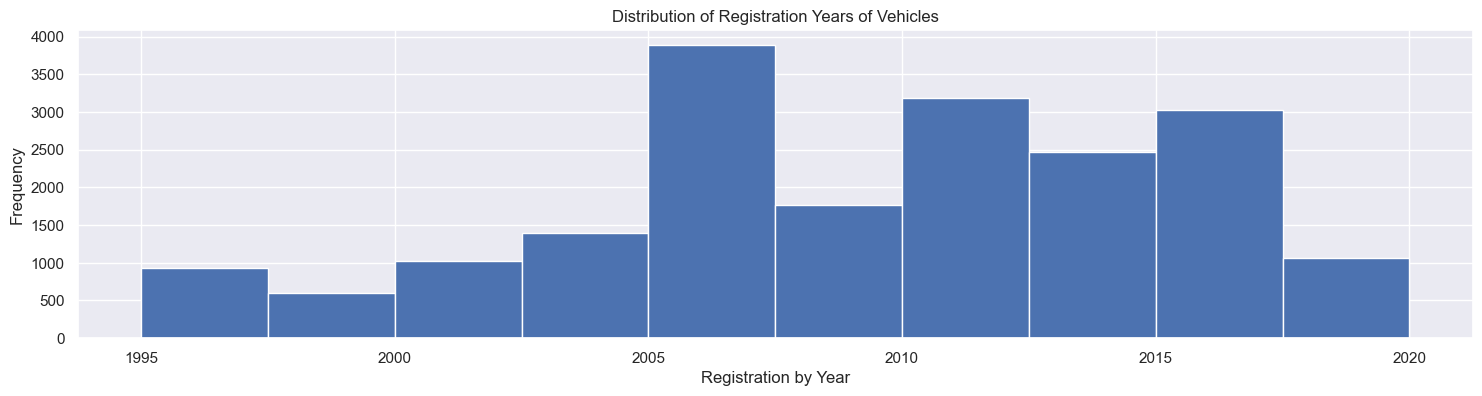

In [210]:
# Plotting the histogram for having a look at the most registration of vehicles by year
fig = plt.figure(figsize = (18,4))
df2["Year"].plot.hist()
plt.title("Distribution of Registration Years of Vehicles")
plt.xlabel("Registration by Year")

In [16]:
# Using Pivot table fucntion for counting the brand.
AllBrands = df2.pivot_table(index = ['Brand'], aggfunc ='size')
print(AllBrands)

Brand
Audi                    17
BMW                     22
Changan                  8
Chevrolet               47
Classic & Antiques       1
Daewoo                  31
Daihatsu              1879
FAW                     79
Honda                 3111
Hyundai                232
KIA                    128
Land Rover               1
Lexus                   23
Mazda                   77
Mercedes                63
Mitsubishi             283
Nissan                 550
Other Brands           111
Porsche                  2
Range Rover              6
Subaru                  17
Suzuki                8107
Toyota                4548
dtype: int64


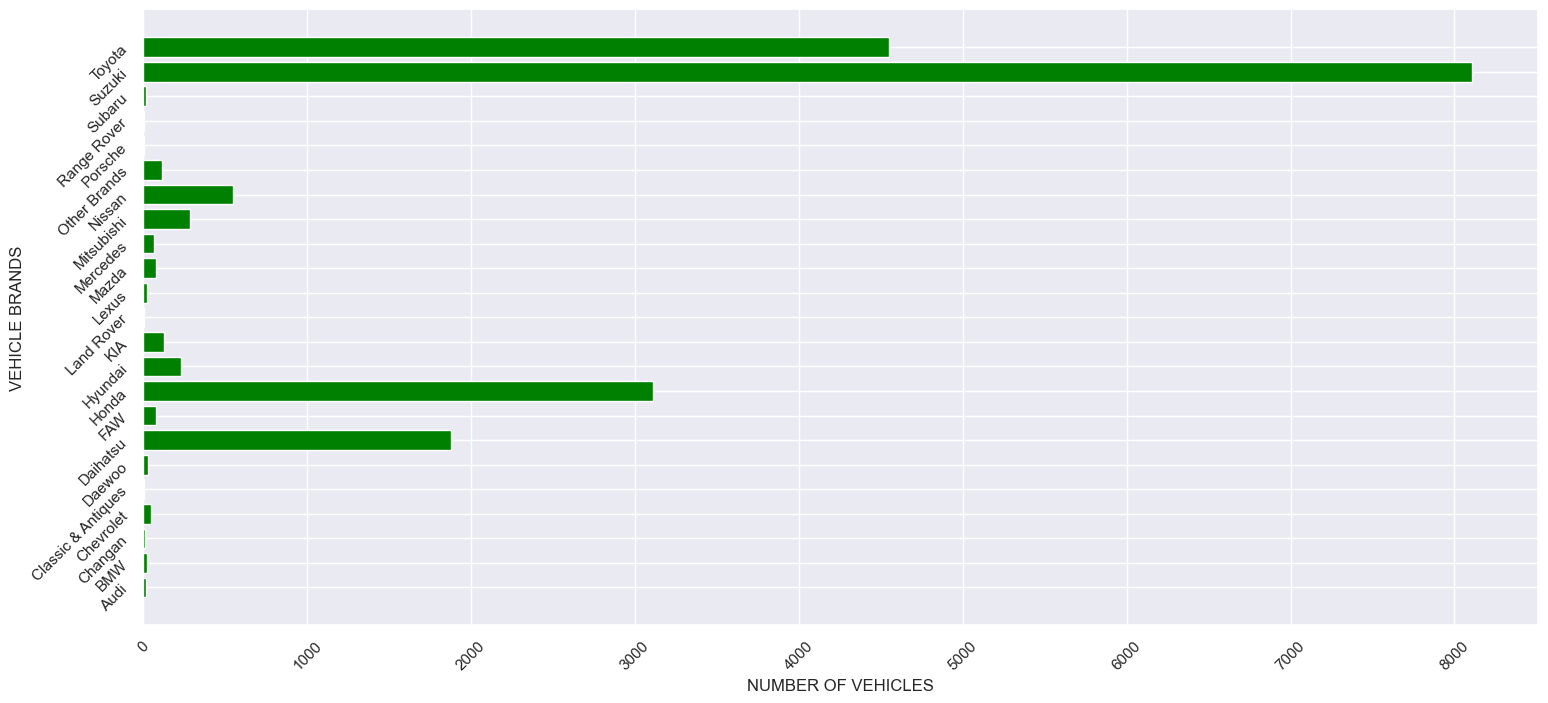

In [151]:
# Plotting the Horizontal Bar to view the 
fig = plt.figure(figsize = (18, 8))
plt.barh(AllBrands.index, AllBrands.values, color = 'green')
plt.ylabel("VEHICLE BRANDS")
plt.xlabel("NUMBER OF VEHICLES")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

The above graph is showing that most vehilcles are sold pertains to the Suzuki Brand, following Toyota then Honda.

In [18]:
# Using Pivot table fucntion for counting the Models.
VName = df2.pivot_table(index = ['Model'], aggfunc ='size')
print(VName)

Model
120 Y                           1
2 Series                        1
250 D                           1
3 Series                        5
323                             1
350Z                            3
5 Series                        5
626                             1
7 Series                        5
86                             21
A Class                         1
A1                              3
A3                              3
A4                              4
A5                              2
A6                              1
AD Van                         22
APV                            26
Accent                          4
Accord                         78
Acty                           40
Airwave                        11
Allion                         12
Alphard Hybrid                  2
Alto                         1636
Alto Lapin                     22
Aqua                          277
Atrai Wagon                    39
Auris                           1
Avanza  

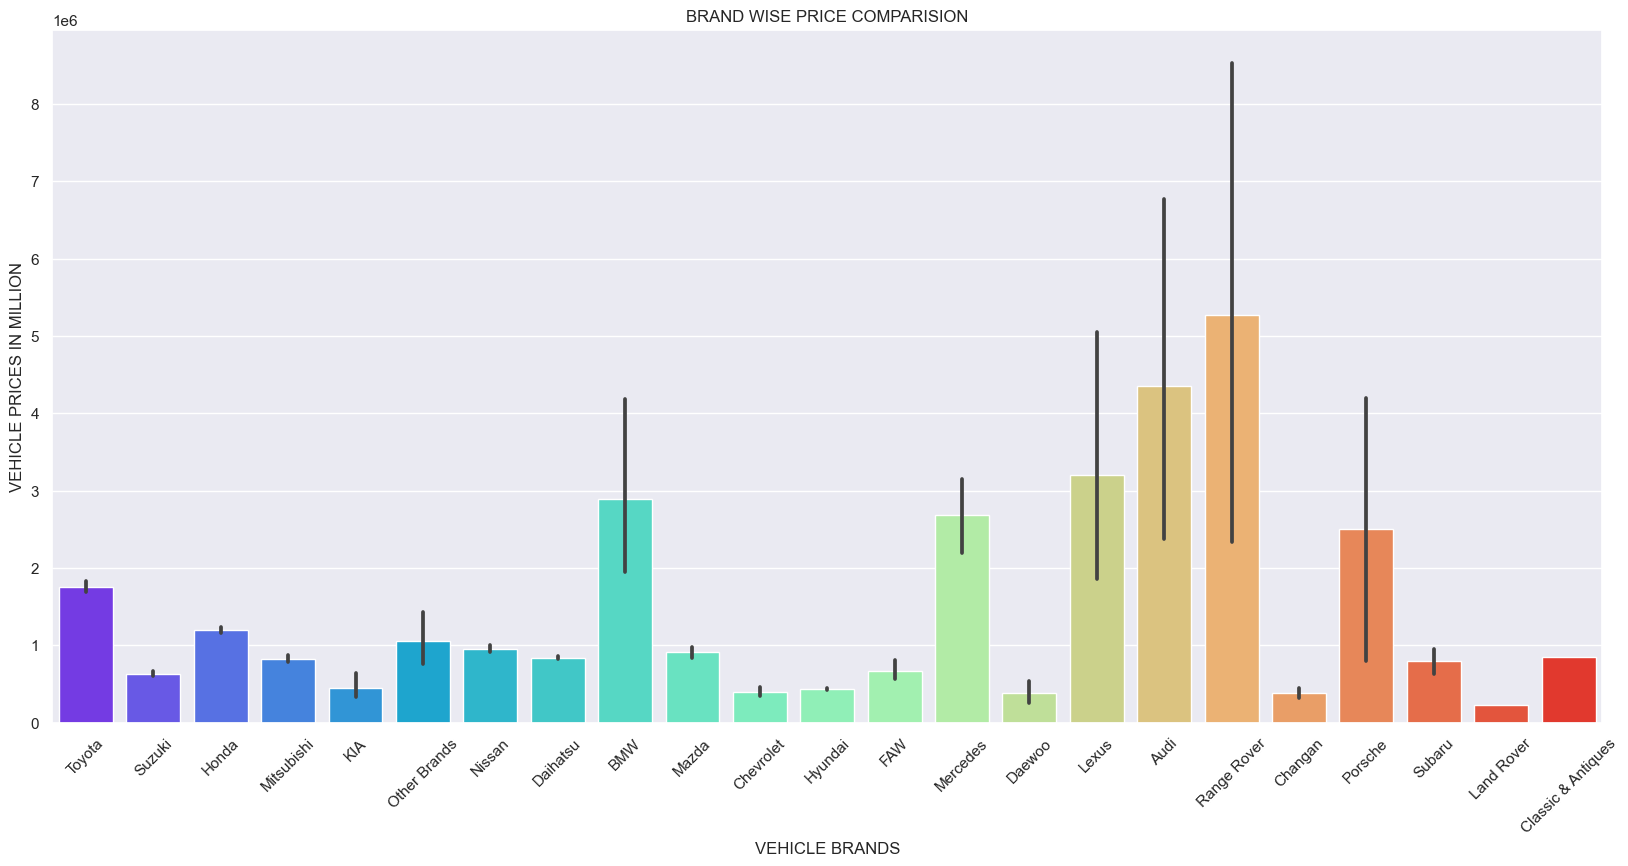

In [158]:

plt.figure(figsize = (20, 9))
sns.barplot(x = 'Brand',y = 'Price', data = df2, palette = 'rainbow')
plt.title("BRAND WISE PRICE COMPARISION")
plt.ylabel("VEHICLE PRICES IN MILLION")
plt.xlabel("VEHICLE BRANDS")
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
None

The above graph is revealing that Range Rover is the most expensive vehicle, also Audi Lexus and Mecedes along with BMW and Porsche found the expensive brands

<Figure size 1800x400 with 0 Axes>

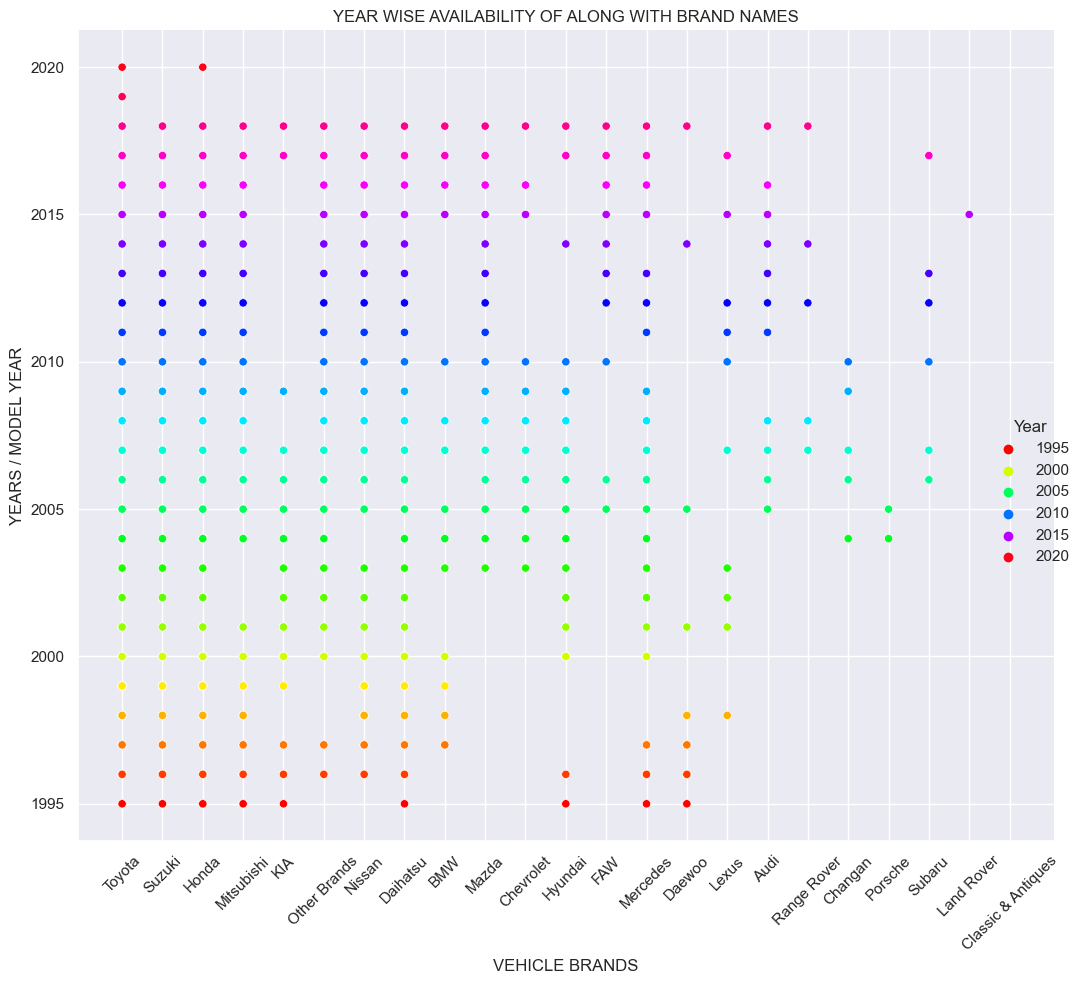

In [196]:
fig = plt.figure(figsize = (18,4))
# ax = fig.add_subplot(111)
sns.set_theme()
sns.relplot(data = df2, x = 'Brand', y = 'Year', hue = 'Year', palette = 'hsv', height = 10, alpha = 1)
plt.title("YEAR WISE AVAILABILITY OF ALONG WITH BRAND NAMES")
plt.ylabel("YEARS / MODEL YEAR")
plt.xlabel("VEHICLE BRANDS")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
None

Year wise comparision of different Brands from 1995 to 2020, the above plot is expressing how many year's registered vehicle are available for the sale
the data is showing as we have very less vehicles for the year 2020 whereas most of the vehicles are fall under year 2005 to 2010

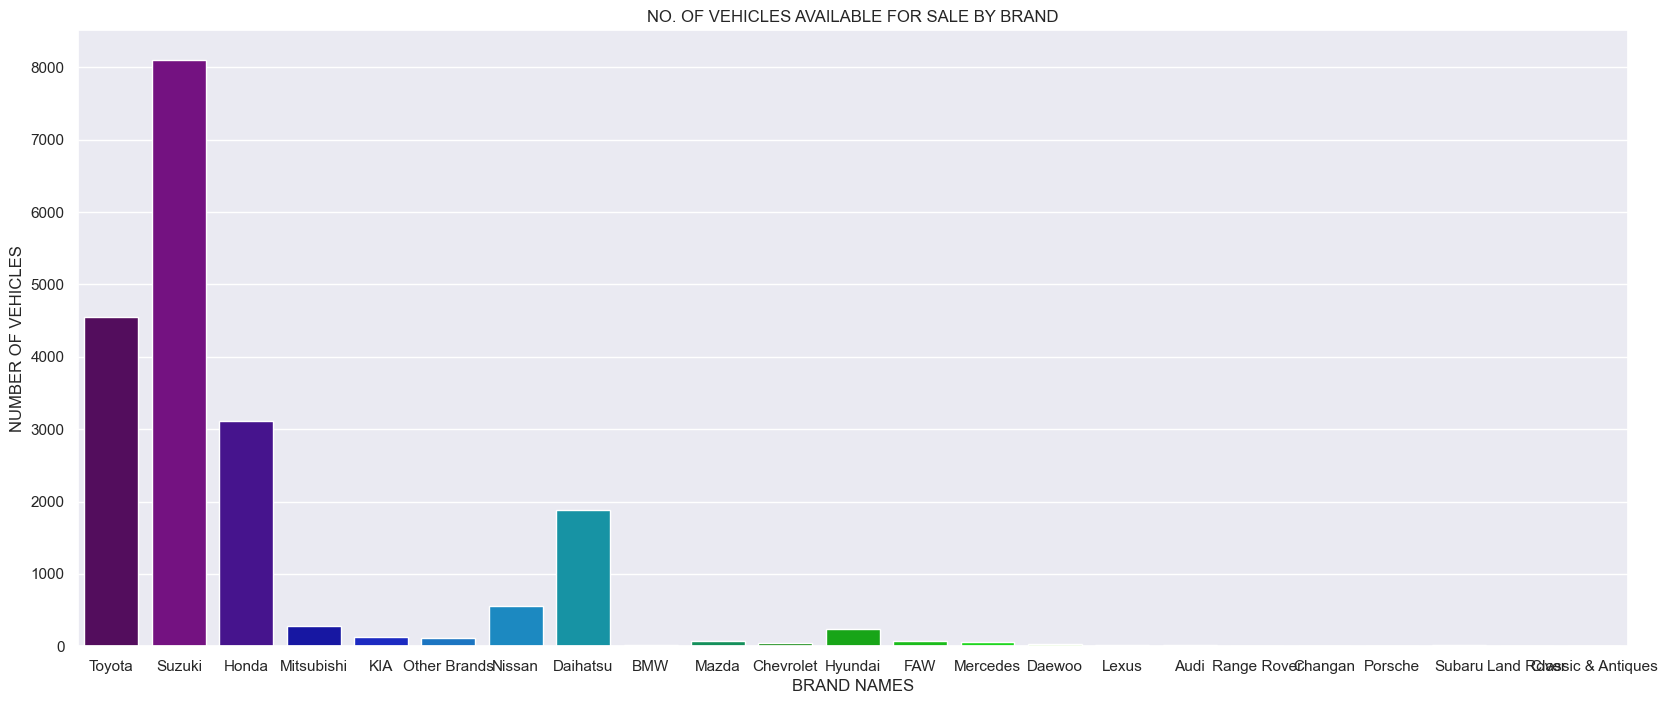

In [198]:
plt.figure(figsize = (20,8))
sns.countplot(x = 'Brand', data = df2, palette = 'nipy_spectral')
plt.title("NO. OF VEHICLES AVAILABLE FOR SALE BY BRAND")
plt.ylabel("NUMBER OF VEHICLES")
plt.xlabel("BRAND NAMES")
None

The above data is showing that there are most of the vehicles for sale are from Suzuki Brand then Toyota and then Honda followed by Daihatsu and many more

In [25]:
# Using Pivot function to use it for plotting available fuel types and which fuel is being used most
FuelType = df2.pivot_table(index = ['Fuel'], aggfunc ='size')
print(FuelType)

Fuel
CNG        4733
Diesel      306
Hybrid      857
LPG           8
Petrol    13320
dtype: int64


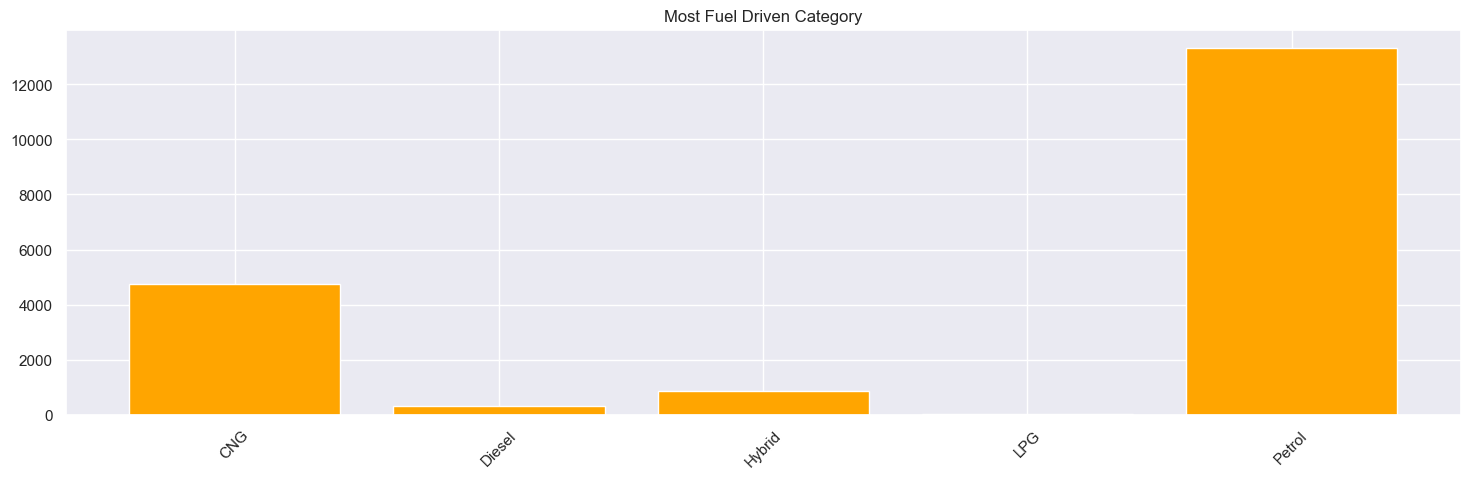

In [199]:
# Let's see which fuel medium is mostly driven in our country
plt.figure(figsize=(18,5))
plt.bar(FuelType.index, FuelType.values, color = 'orange')
plt.title("Most Fuel Driven Category")
plt.xticks(rotation = 45)
None

As we can see that the Petrol is used most,  then CNG being used followed by Hybrid , Diesel is used very lesser compared to other fuel tyes, and LPG is almost None.

Text(0.5, 1.0, 'Vehicle Brand wise comparision of Fuel Usage')

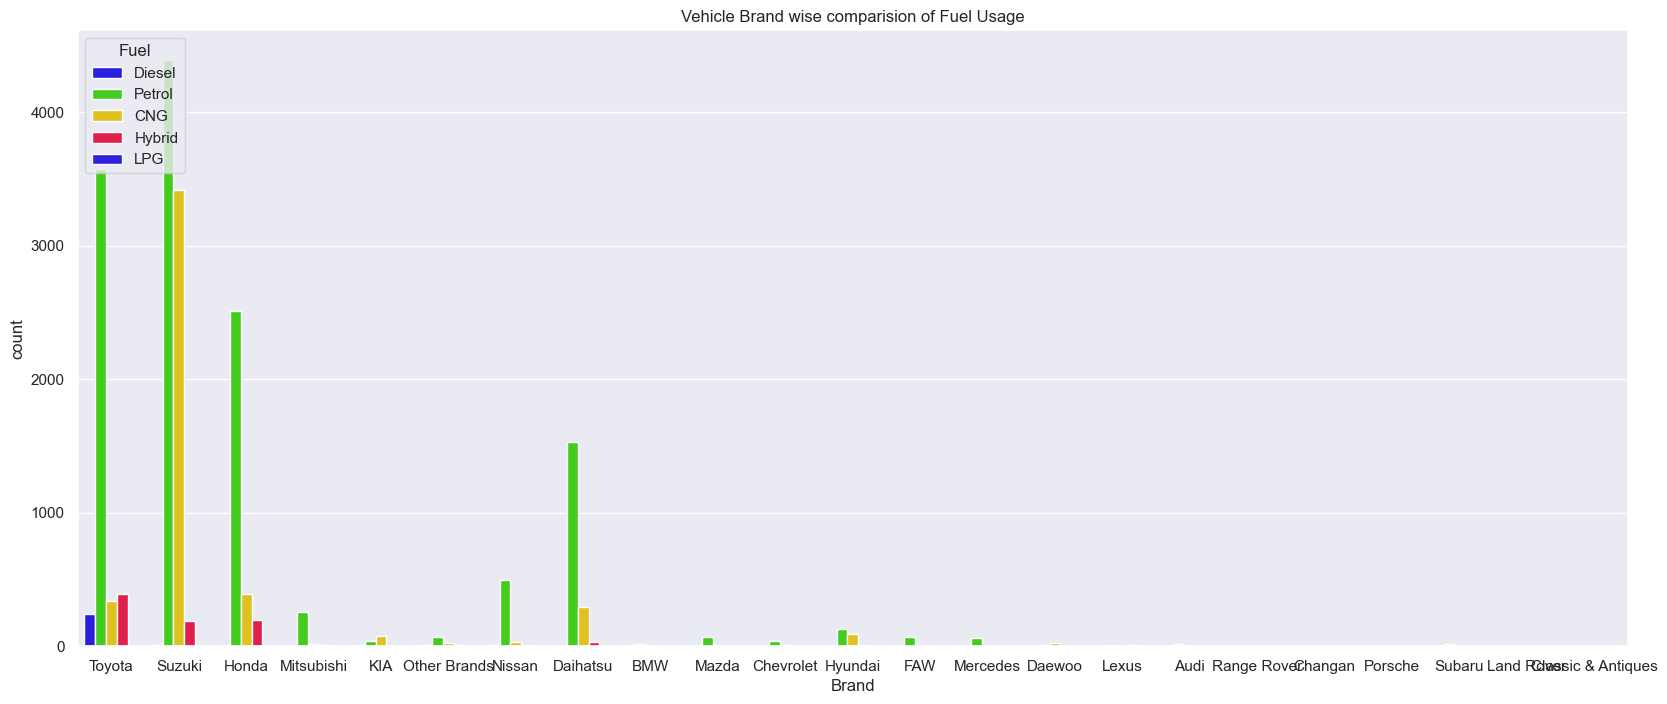

In [28]:
# Countplot for Fuel usage by city
plt.figure(figsize=(20,8))
sns.countplot(x ='Brand', data=df2, palette='prism',hue='Fuel')
plt.title("Vehicle Brand wise comparision of Fuel Usage")

I have tried to depict that which Brand is mostly driven on which type of Fuel, as Petrol is ahead of all the types, however we can see that Suzuki Brand
is also run on CNG Fuel, which means that Suzuki Vehicles are also good at CNG and driven by ordinary peoples

## While We have extracted the Data, now Let's discuss about the Major Cities of Pakistan and Most Popular Brands of Pakistan as most of the data pertains to these Cities and Brands.
##  Now I am trying to let you out some very interesting facts that will catch your interest.

In [29]:
# Extracting the data required data and craeting a new variable named "PopBrandsnCities" for further process
PopBrandsnCities = df2.loc[(df2['Brand'].isin(['Toyota', 'Honda', 'Suzuki'])) & (df2['Registered City'].isin(['Karachi', 'Lahore', \
'Islamabad', 'Quetta', 'Peshawar']))]
PopBrandsnCities

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0
...,...,...,...,...,...,...,...,...,...
24961,Suzuki,Used,CNG,999999.0,Cultus VXR,380000,Karachi,Cash,2001.0
24962,Toyota,Used,Petrol,200000.0,Vitz,725000,Karachi,Cash,1999.0
24966,Toyota,Used,Petrol,76190.0,Avanza,1175000,Lahore,Cash,2011.0
24968,Toyota,Used,CNG,200000.0,Corolla XE,1070000,Lahore,Cash,2001.0


In [30]:
# Reviewing the Cities that were extracted
PopBrandsnCities['Registered City'].unique()

array(['Karachi', 'Islamabad', 'Lahore', 'Peshawar', 'Quetta'],
      dtype=object)

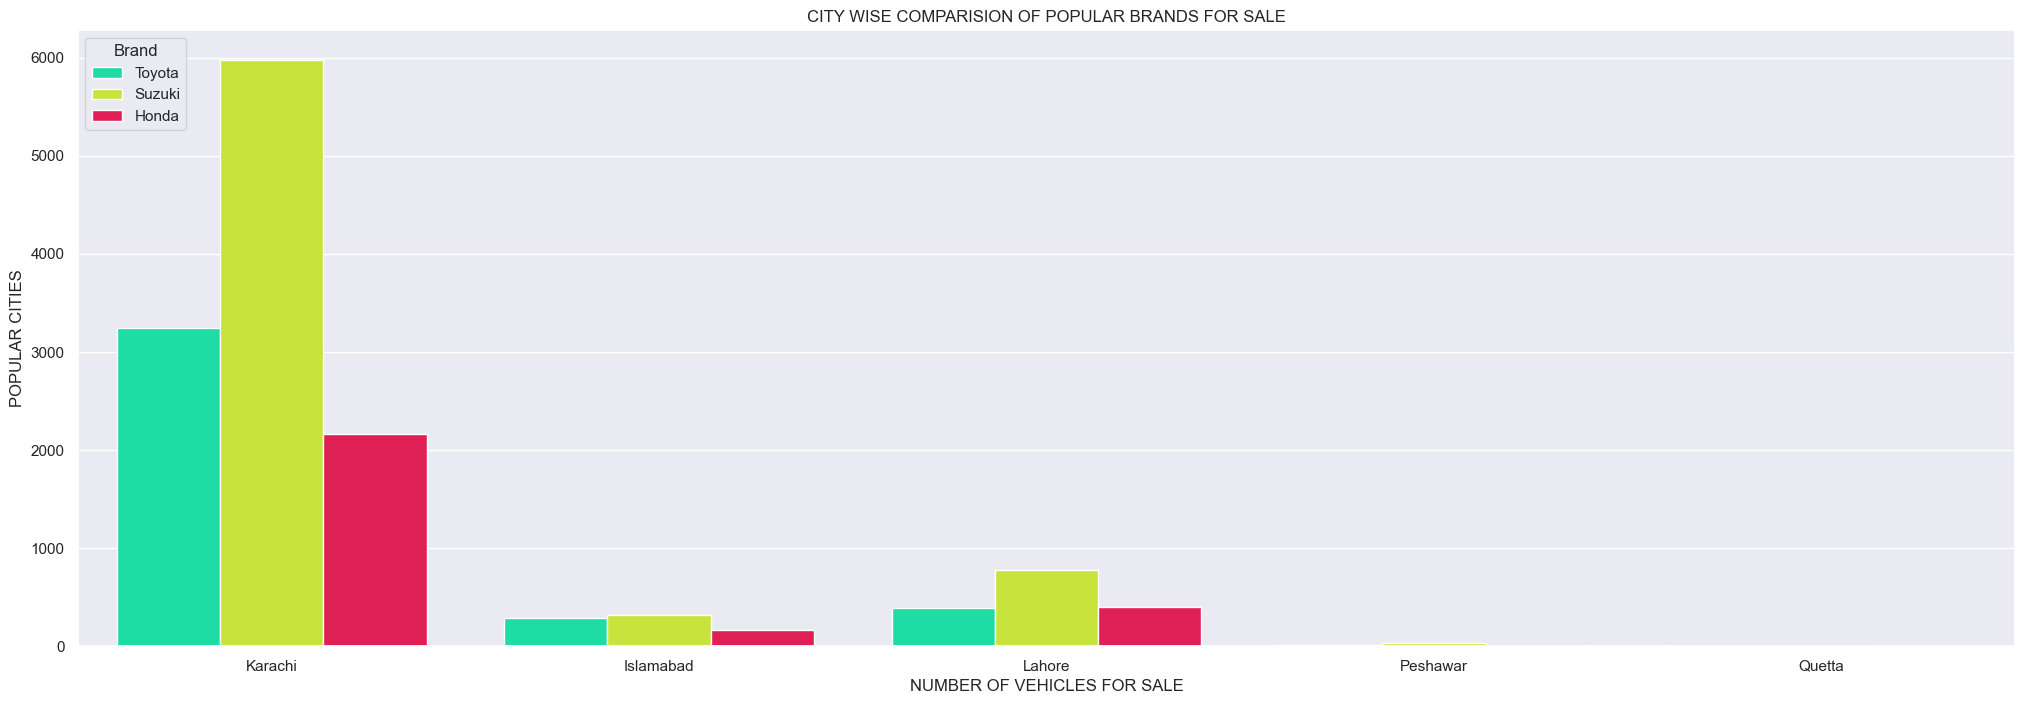

In [201]:
# Plotting countplot to view the sales of Popuar brands city wise
plt.figure(figsize=(25,8))
sns.countplot(x ='Registered City', data = PopBrandsnCities, palette='gist_ncar',hue='Brand')
plt.title("CITY WISE COMPARISION OF POPULAR BRANDS FOR SALE")
plt.ylabel("POPULAR CITIES")
plt.xlabel("NUMBER OF VEHICLES FOR SALE")
None

Above we can see that in Karachi City Suzuki Vehicles are for sale mostly, even in Lahore and Islamabad Suzuki Vehicles are for sale at most followed by Toyota Brand

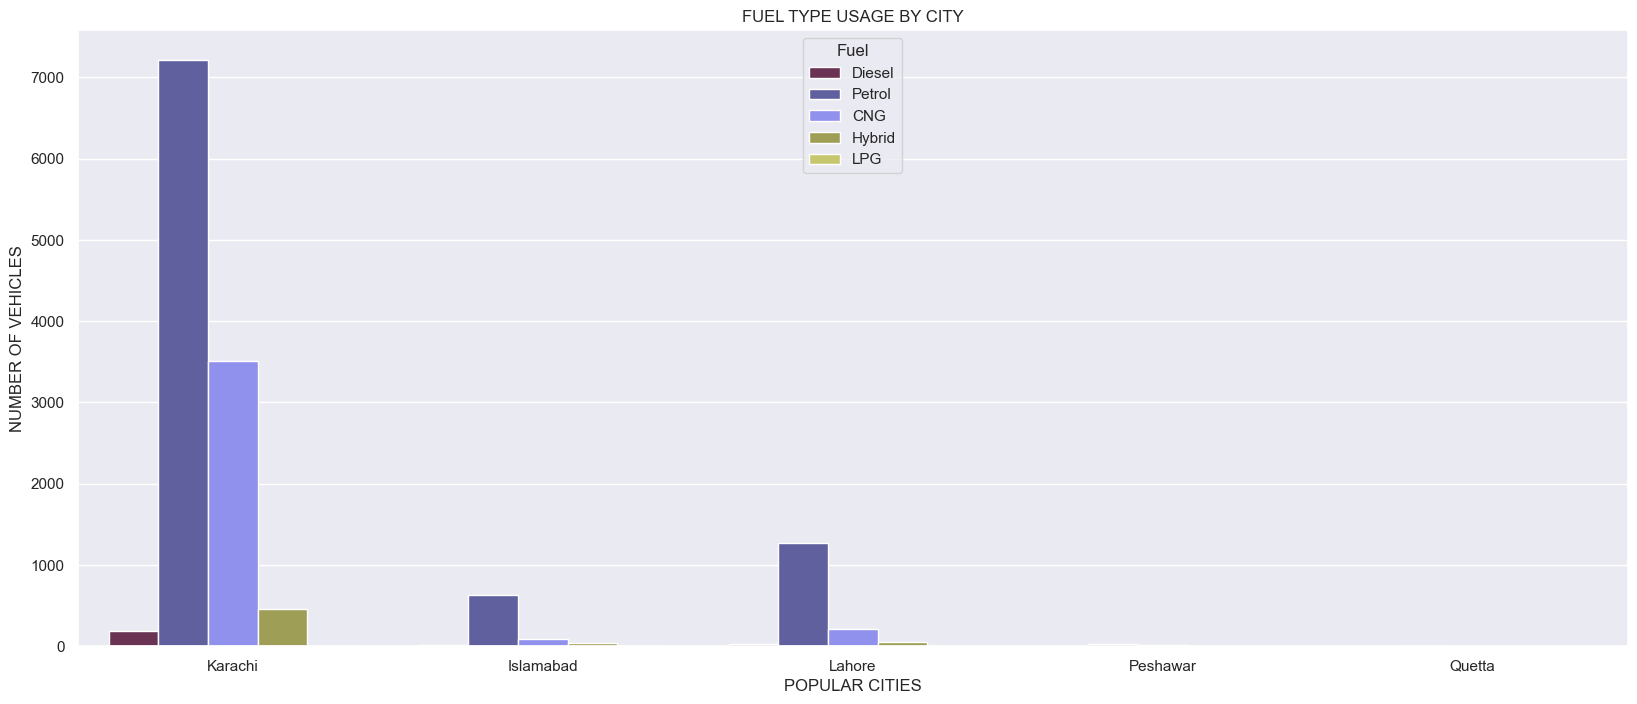

In [202]:
# Plotting the countplot to view which type of Fuel is being used city wise
plt.figure(figsize=(20,8))
sns.countplot(x ='Registered City', data=PopBrandsnCities, palette='gist_stern',hue='Fuel')
plt.title("FUEL TYPE USAGE BY CITY")
plt.ylabel("NUMBER OF VEHICLES")
plt.xlabel("POPULAR CITIES")
None

As per data Petrol vehicle is driven mostly in Karachi City, along with this CNG is also used followed by Hibrid and Diesel, overall Petrol is used most in big cities.

In [33]:
# Creating the sepearte dataframes for Honda Toyota and Suzuki Brands to extract the information pertaining to their different models
HondaBrand = df2.loc[df2['Brand'] == 'Honda']
ToyotaBrand = df2.loc[df2['Brand'] == 'Toyota']
SuzukiBrand = df2.loc[df2['Brand'] == 'Suzuki']

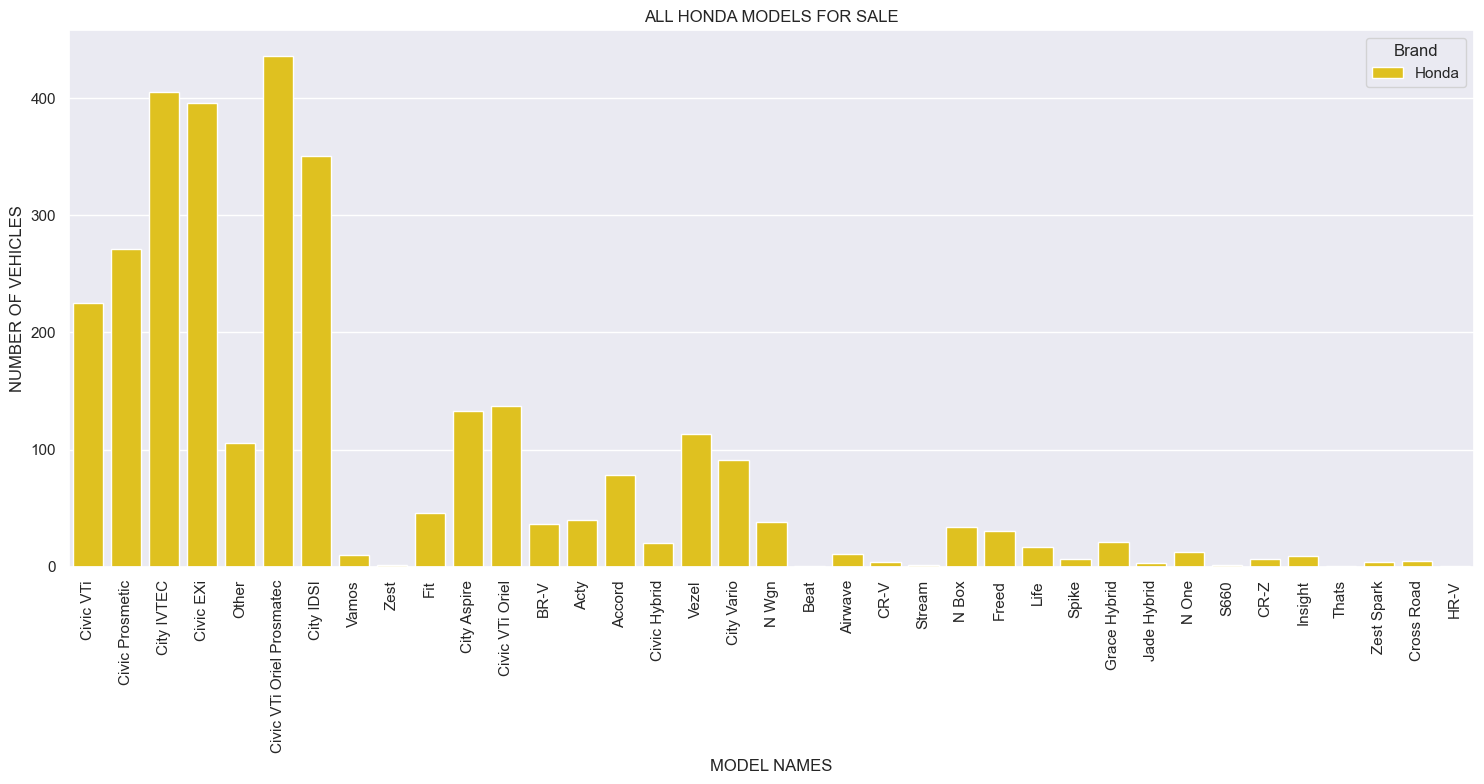

In [203]:
# Plotting countplot to see what models of Honda Brand and how many of these are being sold at all
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot (111)
chart = sns.countplot(x = 'Model', data = HondaBrand, palette = 'prism', hue = 'Brand')
plt.title("ALL HONDA MODELS FOR SALE")
plt.ylabel("NUMBER OF VEHICLES")
plt.xlabel("MODEL NAMES")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.tight_layout()
None

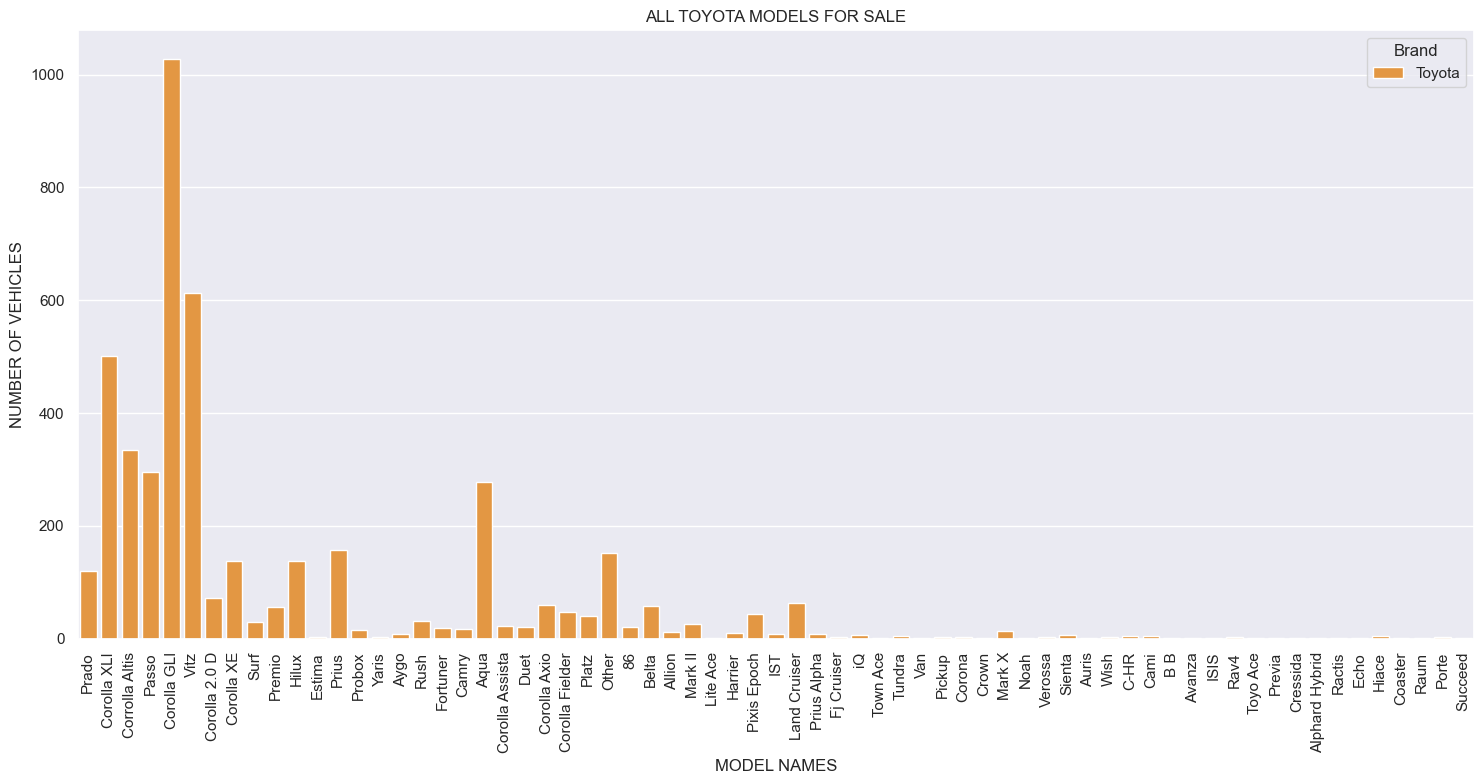

In [204]:
# Plotting countplot to see what models of Toyota Brand and how many of these are being sold at all
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
chart = sns.countplot(x = 'Model', data = ToyotaBrand, palette = 'YlOrBr', hue = 'Brand')
plt.title("ALL TOYOTA MODELS FOR SALE")
plt.ylabel("NUMBER OF VEHICLES")
plt.xlabel("MODEL NAMES")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.tight_layout()
None

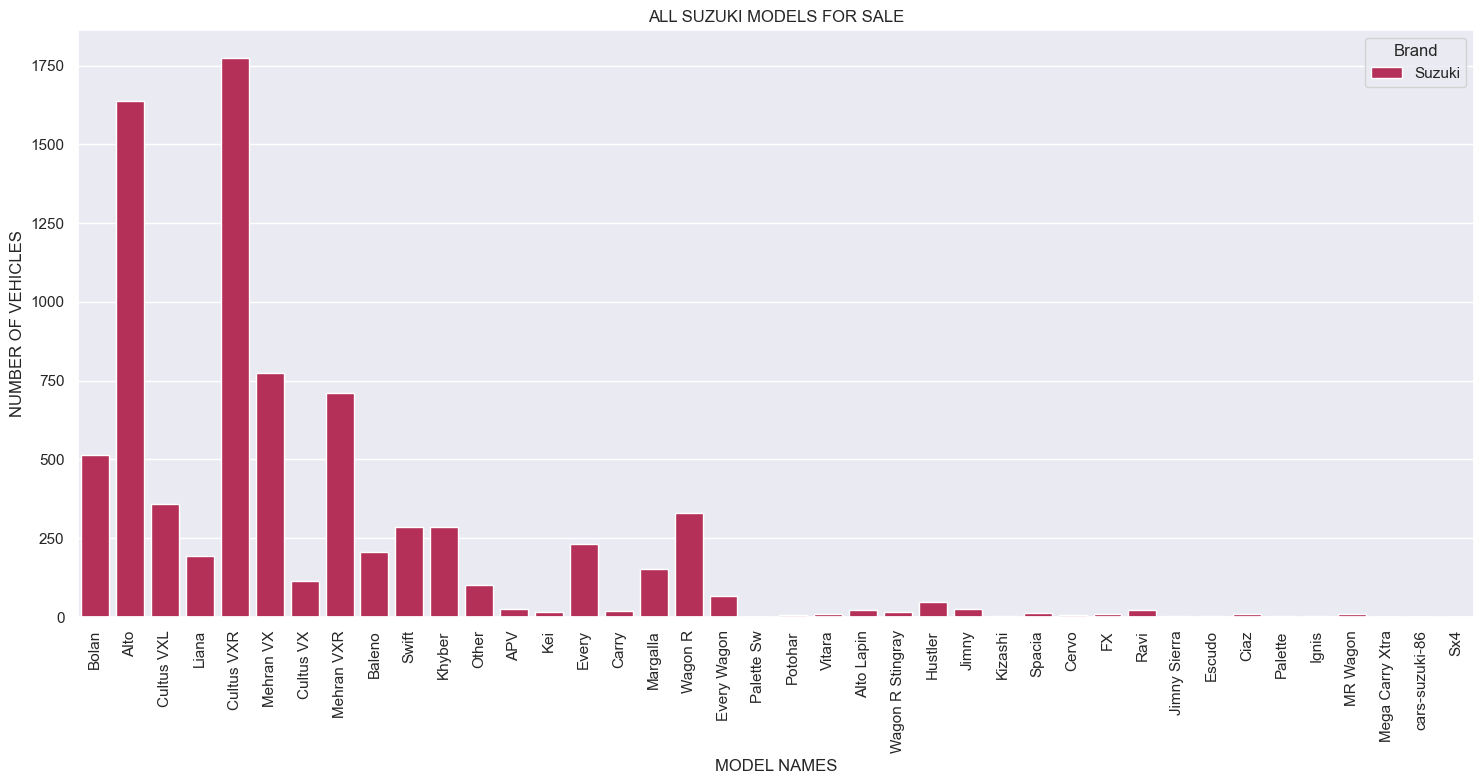

In [205]:
fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)
chart = sns.countplot(x = 'Model', data = SuzukiBrand, palette = 'rocket_r', hue = 'Brand', ax = ax)
plt.title("ALL SUZUKI MODELS FOR SALE")
plt.ylabel("NUMBER OF VEHICLES")
plt.xlabel("MODEL NAMES")
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.tight_layout()
None

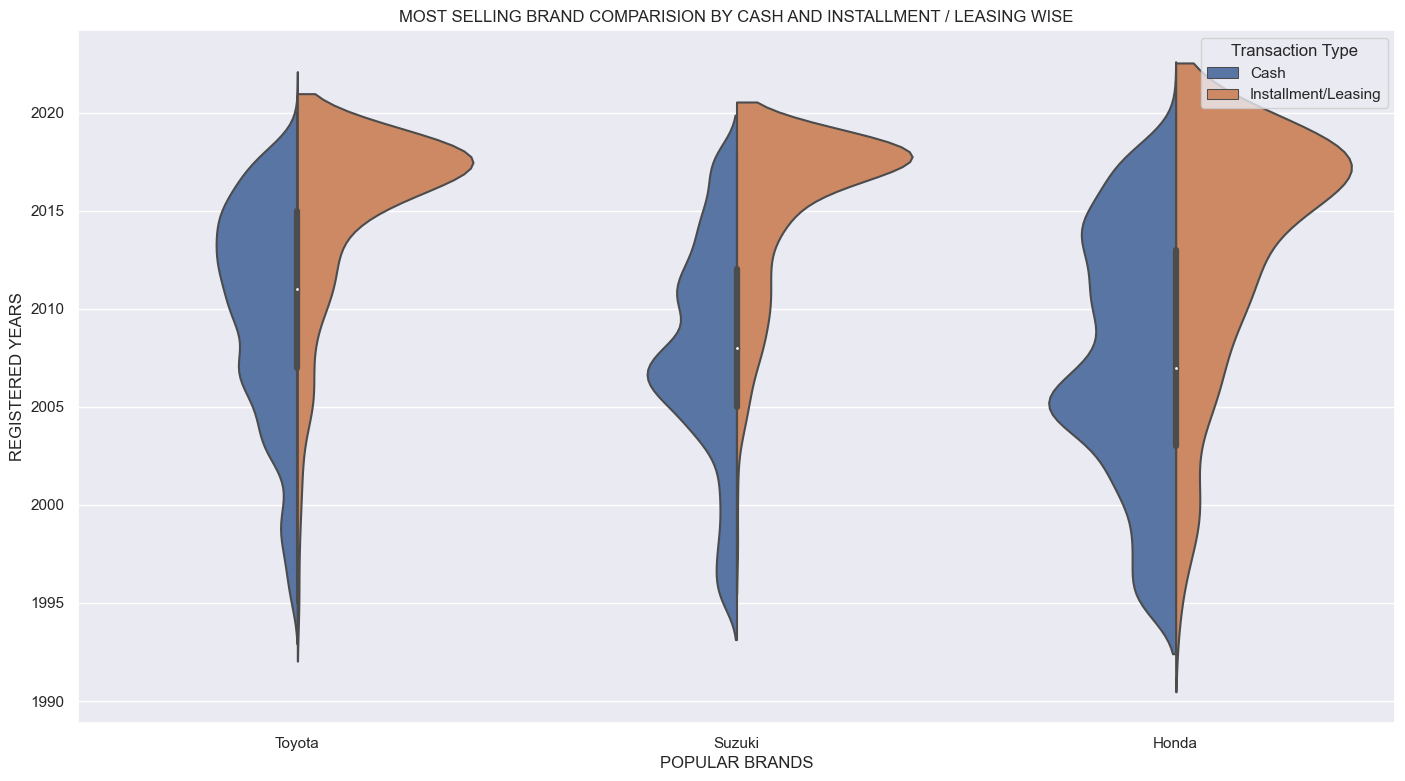

In [206]:
# Plotting the Violin plot to compare the Cash and Installment comparision between different popular brands
plt.figure(figsize=(17, 9))
sns.violinplot(x = "Brand", y = "Year", hue = "Transaction Type", data = PopBrandsnCities, split = True)
# Add a title and labels for x and y axes
plt.title("MOST SELLING BRAND COMPARISION BY CASH AND INSTALLMENT / LEASING WISE")
plt.xlabel("POPULAR BRANDS")
plt.ylabel("REGISTERED YEARS")
plt.show()

The above Violin plot expressed that by Category "Installment / Leasing" the Honda is available for sale at most whereas Suzuki at the last in this category.

In [38]:
# Extracting the Specific Popular Brand along with Popular Cities to view how many of vehicles models are sale City wise
HondaBrandsnPopCities = df2.loc[(df2['Brand'].isin(['Honda'])) & (df2['Registered City'].isin(['Karachi', 'Lahore', \
'Islamabad', 'Quetta', 'Peshawar']))]
ToyotaBrandsnPopCities = df2.loc[(df2['Brand'].isin(['Toyota'])) & (df2['Registered City'].isin(['Karachi', 'Lahore', \
'Islamabad', 'Quetta', 'Peshawar']))]
SuzukiBrandsnPopCities = df2.loc[(df2['Brand'].isin(['Suzuki'])) & (df2['Registered City'].isin(['Karachi', 'Lahore', \
'Islamabad', 'Quetta', 'Peshawar']))]

In [39]:
# Extracting the information for Specific brand only along with popular cities to see city wise sale of all models
df_pivot = HondaBrandsnPopCities.pivot_table(index='Model', columns = 'Registered City', values = 'Brand', aggfunc = 'count')
df_pivot2 = ToyotaBrandsnPopCities.pivot_table(index='Model', columns = 'Registered City', values = 'Brand', aggfunc = 'count')
df_pivot3 = SuzukiBrandsnPopCities.pivot_table(index='Model', columns = 'Registered City', values = 'Brand', aggfunc = 'count')

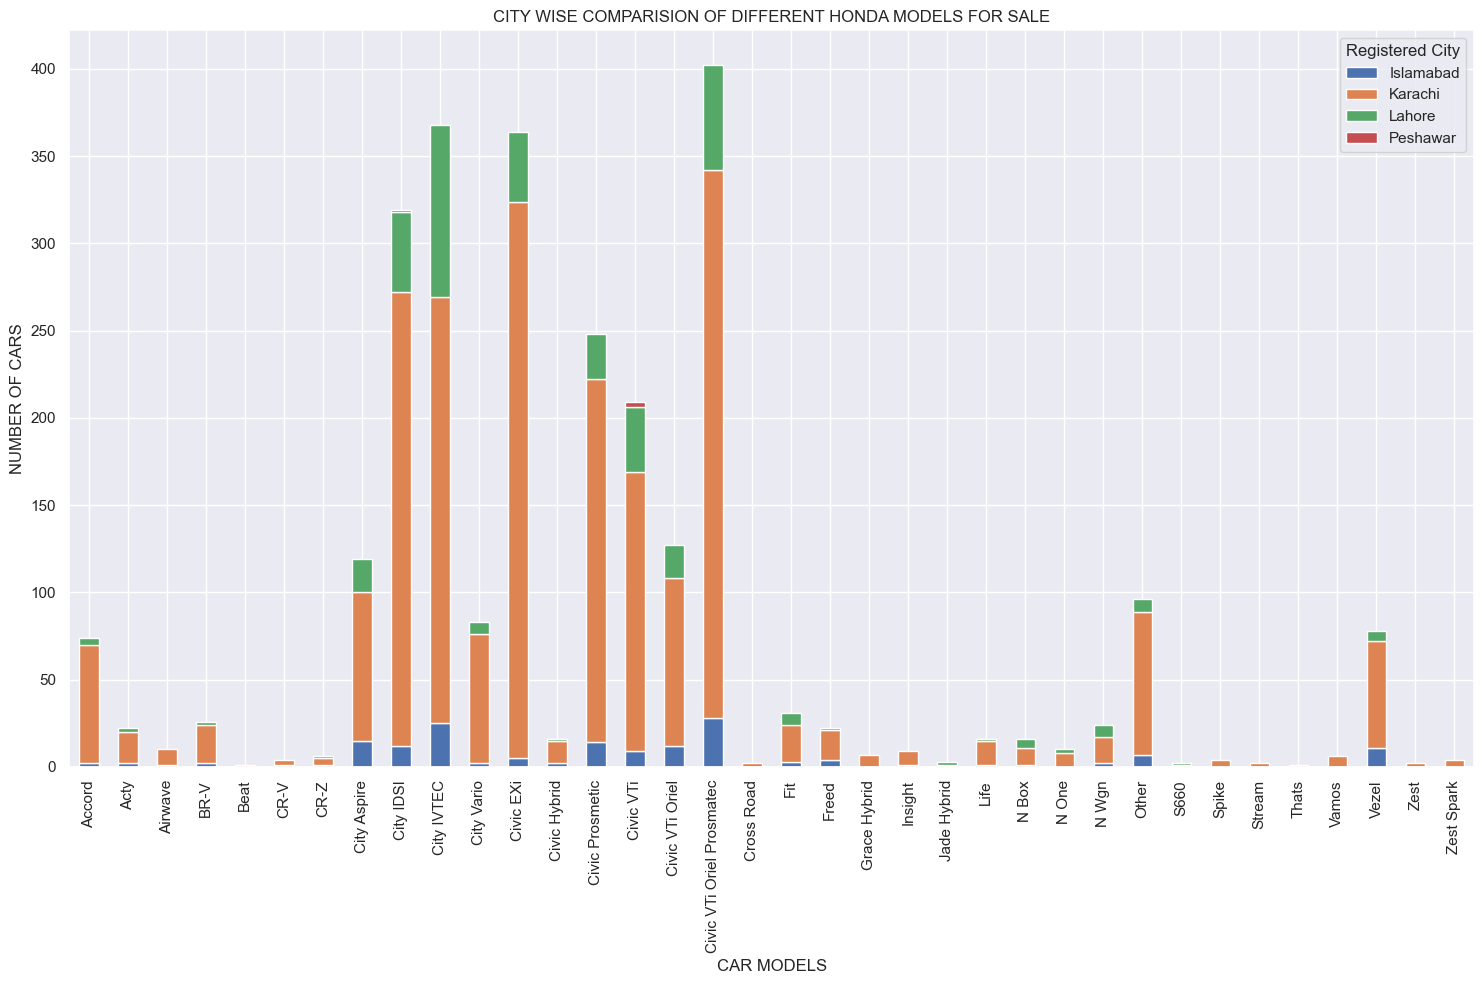

In [207]:
# Plotting the stacked plot to review the Honda models for sale in popular cities
df3 = HondaBrandsnPopCities.set_index("Model")
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
df_pivot.plot(kind='bar', stacked=True, ax = ax)
plt.title("CITY WISE COMPARISION OF DIFFERENT HONDA MODELS FOR SALE")
plt.xlabel("CAR MODELS")
plt.ylabel("NUMBER OF CARS")
plt.tight_layout()
None

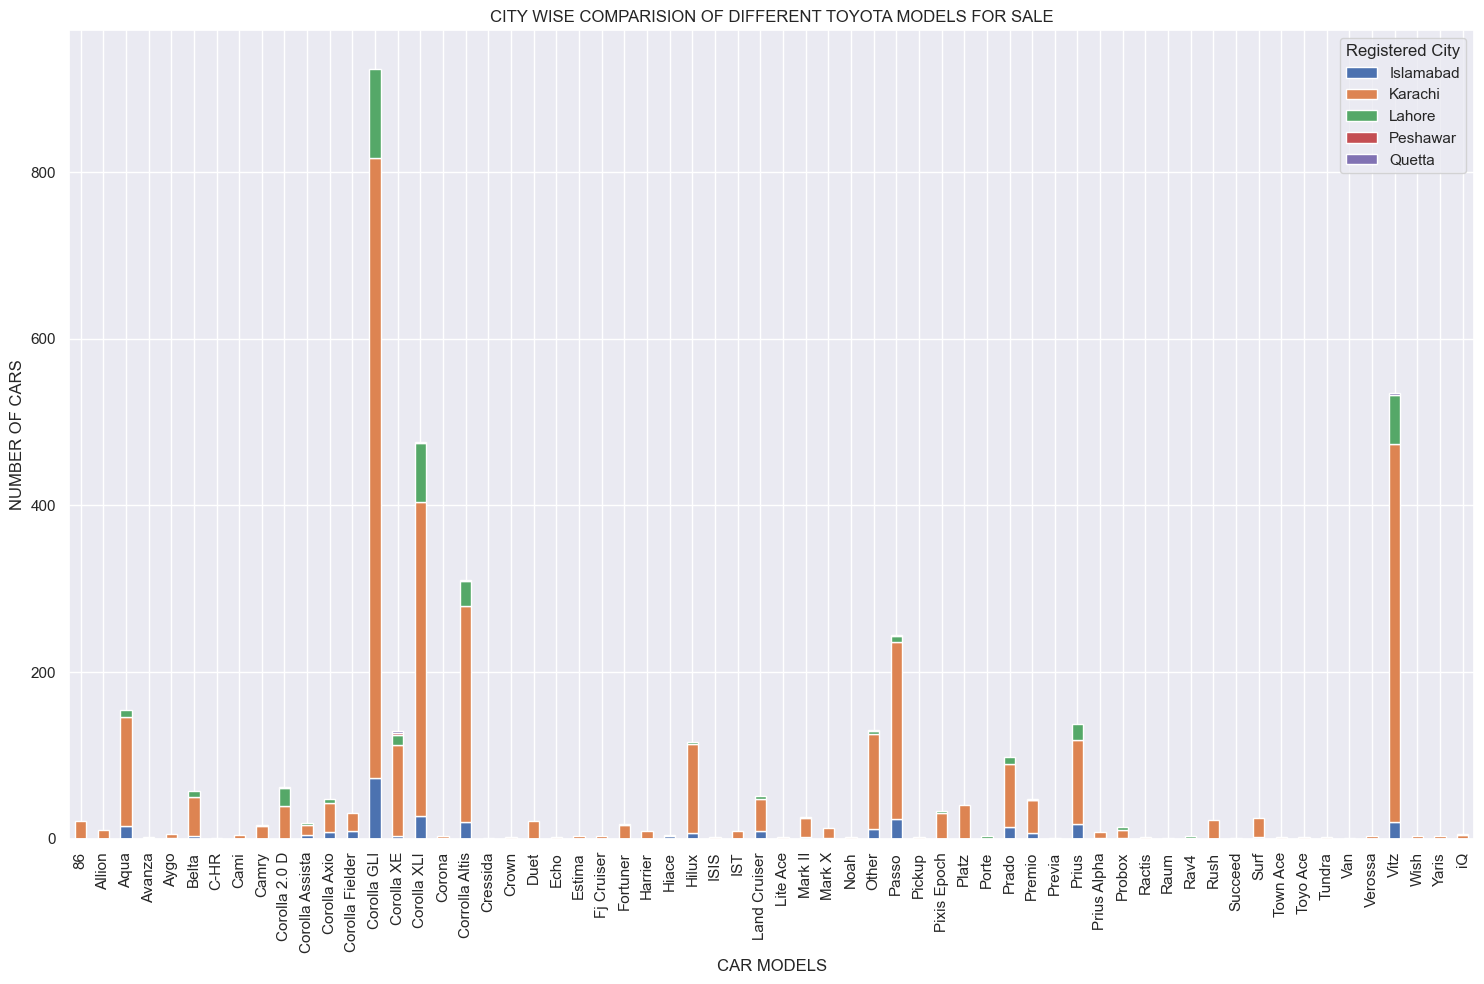

In [208]:
# Plotting the stacked plot to review the Toyota models for sale in popular cities
df4 = ToyotaBrandsnPopCities.set_index("Model")

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
df_pivot2.plot(kind='bar', stacked=True, ax=ax)
plt.title("CITY WISE COMPARISION OF DIFFERENT TOYOTA MODELS FOR SALE")
plt.xlabel("CAR MODELS")
plt.ylabel("NUMBER OF CARS")
plt.tight_layout()
plt.tight_layout()
None


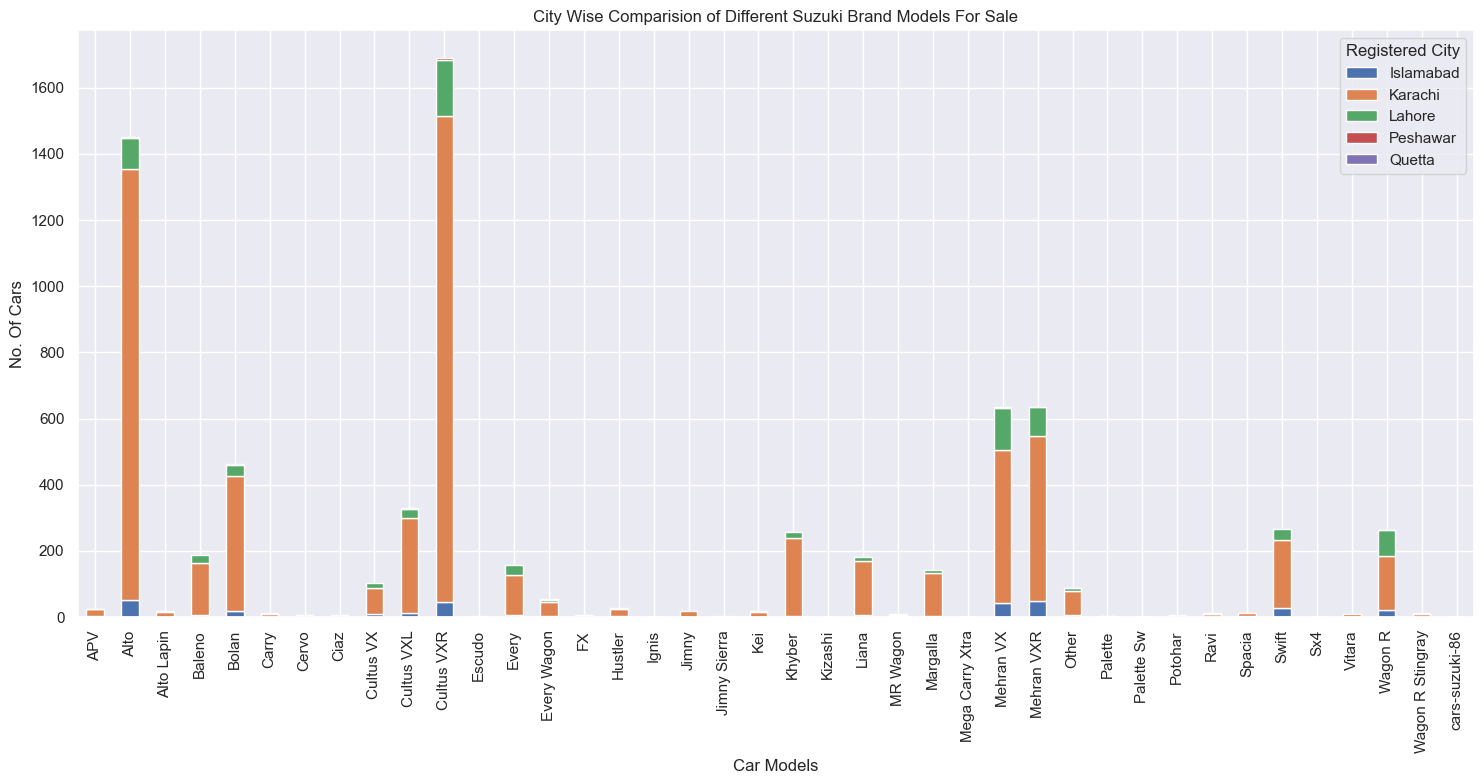

In [111]:
df5 = SuzukiBrandsnPopCities.set_index("Model")

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
df_pivot3.plot(kind = 'bar', stacked = True, ax = ax)
plt.title("CITY WISE COMPARISION OF DIFFERENT SUZUKI MODELS FOR SALE")
plt.xlabel("CAR MODELS")
plt.ylabel("NUMBER OF CARS")
plt.tight_layout()
plt.tight_layout()
None


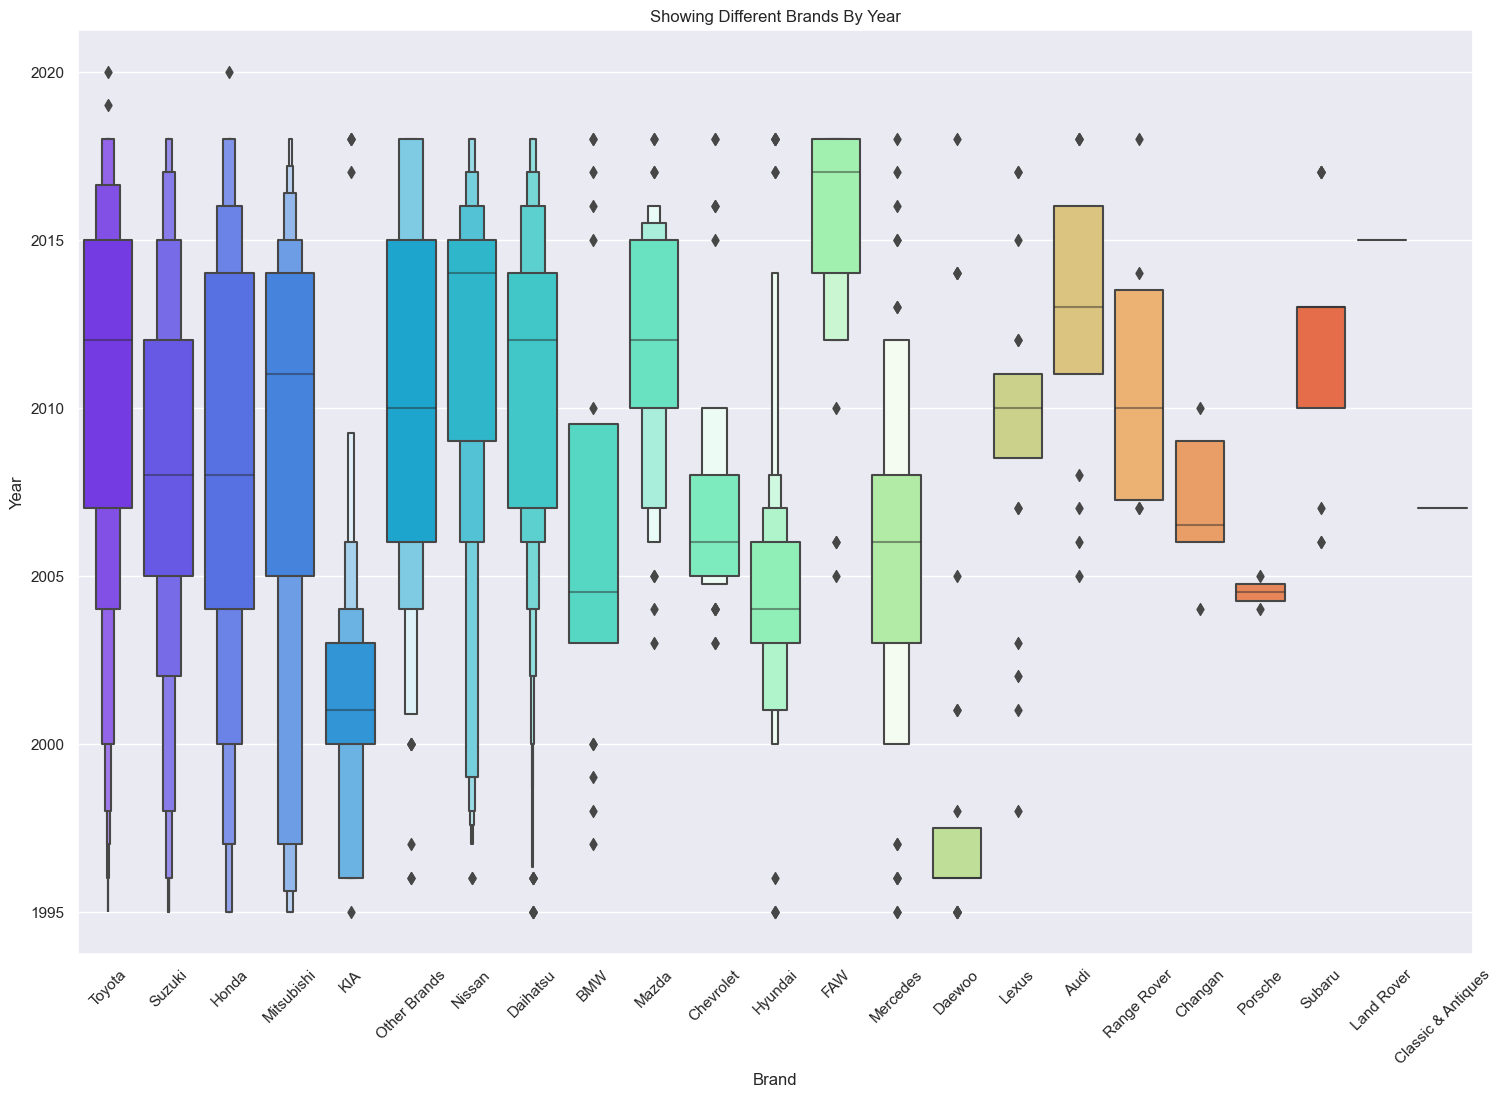

In [59]:
# Year wise all brands for sale showing through Boxenplot
plt.figure(figsize=(18,12))
sns.boxenplot(x='Brand', y = 'Year', data = df2, palette = 'rainbow')
plt.title("Showing Sale of Different Brands By Year")
plt.xticks(rotation = 45)
None

Year wise all brands for sale, above it was also plotted through rale plot however, for another glance and clear understanding I have shown some different style plot to the above information

## Wrapping Up

I hope you all enjoyed this short introduction to some of data visualization, these simple data visualizations we can create with Seaborn, Matplotlib and Pandas.

I will try to bring more datasets having more and diffferent types of visualization for better concept building, People who are very begginer to this can also take
the idea and same can apply over the data set that you like and incorprating them into your own workflow!

I encourage your suggestion and ideas towards my job, will try to bring more such notebooks in future as well.